### Import necessary libraries

In [1]:
from skimage.external import tifffile

In [2]:
# import necessary libraries
from skimage.external import tifffile
from scipy.ndimage import label
from matplotlib import pyplot as plt
from scipy.spatial import KDTree
import pandas as pd
import scipy.ndimage as ndi
import glob
import h5py
import os
import numpy as np
import dabest

#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob

print("We're using DABEST v{}".format(dabest.__version__))

/home/betalab/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


We're using DABEST v0.2.4


### Graph generation

In [4]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

### csv infomation
0: metastatic volume? \
1: distance from Ki67? \
2: distance from VEGFR3? \
3: distance from Iba1? \

In [5]:
file = '190628_A549-mCh_BSA_Ki-F_VR3-549_Iba1-635_01_590CG_dp50-p10.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

#change directory
os.chdir(csvdir)
#make dataframe 
df11 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df11.loc[df11['0']>=0, '0'] = 11

#save csv file
df11.to_csv( filename, index=False, float_format='%.2f' )
print (df11)

         0          1        2       3       4
0     11.0   14293.12    52.73    6.20   13.72
1     11.0    2722.50   472.65   21.03    5.83
2     11.0    6125.62   430.28   13.87    6.32
3     11.0   27225.00   468.52    5.05   44.32
4     11.0  258637.50   168.05   22.41  214.05
5     11.0   12931.88   524.82   15.46    3.20
6     11.0   23821.88   636.10    6.21   13.58
7     11.0   20418.75   579.16    3.38   11.16
8     11.0   10890.00    88.61    4.51   11.84
9     11.0    2722.50   554.99   51.02    6.48
10    11.0   24502.50    85.16    2.81    2.81
11    11.0   12251.25   348.05    9.76    2.00
12    11.0    1361.25   382.74   25.09    4.12
13    11.0    1361.25   274.10  119.89    5.00
14    11.0     680.62    53.13    8.25   15.37
15    11.0   12251.25   506.96    5.09    3.31
16    11.0    4083.75   426.73   15.19    8.54
17    11.0    8848.12   258.71    5.57    5.57
18    11.0   16335.00   555.98    4.60   31.79
19    11.0   21099.38   400.47    6.19   17.69
20    11.0   

In [6]:
file = '190628_A549-mCh_BSA_Ki-F_VR3-549_Iba1-635_03_590CG_dp50-p10.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

#change directory
os.chdir(csvdir)
#make dataframe 
df12 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df12.loc[df12['0']>=0, '0'] = 12

#save csv file
df12.to_csv( filename, index=False, float_format='%.2f' )
print (df12)

         0         1       2       3       4
0     12.0   5445.00   71.74    6.30    2.39
1     12.0  21780.00   48.60    4.27   14.16
2     12.0  12251.25   58.76    7.13    5.99
3     12.0  10890.00    8.65   11.61    8.65
4     12.0  35392.50   15.82    6.05   18.99
5     12.0   2722.50   52.00  180.58   17.50
6     12.0   2722.50   84.02    5.83   45.19
7     12.0   4083.75   19.33    3.50    3.50
8     12.0    680.62   43.27   62.77    0.00
9     12.0    680.62   41.25   82.28   15.37
10    12.0   6125.62   48.15  207.45   12.50
11    12.0  18376.88   17.49  142.54   13.96
12    12.0   4764.38   61.21   47.28    2.15
13    12.0  50366.25   73.47    5.23   17.57
14    12.0   6806.25   43.98  148.14    5.32
15    12.0   4083.75   84.40  202.45    8.33
16    12.0   8167.50   69.23   13.79    6.00
17    12.0    680.62   65.94    8.25   10.00
18    12.0   4764.38   14.82   10.65    4.73
19    12.0    680.62   25.93   76.90   10.00
20    12.0  12251.25   73.52    7.43   11.01
21    12.0

In [7]:
file = '190628_A549-mCh_BSA_Ki-F_VR3-549_Iba1-635_04_590CG_dp50-p10.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

#change directory
os.chdir(csvdir)
#make dataframe 
df13 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df13.loc[df13['0']>=0, '0'] = 13

#save csv file
df13.to_csv( filename, index=False, float_format='%.2f' )
print (df13)

         0         1       2       3       4
0     13.0   5445.00    4.41  450.12    4.41
1     13.0  12931.88   32.42  150.21    4.19
2     13.0   6806.25   51.96  373.42    5.65
3     13.0  31308.75   34.35    6.14   13.68
4     13.0  19057.50   29.31  187.63    2.28
5     13.0   1361.25   13.60    4.12    4.12
6     13.0   2722.50   45.75  264.15   15.00
7     13.0   8167.50   36.96   10.45    2.67
8     13.0   8848.12   16.85   10.20    8.96
9     13.0  27905.62   43.38    2.73   10.14
10    13.0  14293.12   30.74   83.32    0.82
11    13.0   3403.12   89.72  203.79    5.08
12    13.0  23141.25    7.43    6.24    7.43
13    13.0   6806.25   46.10    3.98    3.98
14    13.0  51727.50   35.12    3.32   26.33
15    13.0  19057.50   21.60    5.04    5.04
16    13.0  15654.38   36.68   94.12    6.48
17    13.0    680.62   19.29  132.57    0.00
18    13.0  13612.50   22.10    5.41    7.05
19    13.0  10209.38   18.38    4.87    4.87
20    13.0   1361.25   39.32  176.78    4.12
21    13.0

In [8]:
file = '190628_A549-mCh_BSA_Ki-F_VR3-549_Iba1-635_05_590CG_dp50-p10.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

#change directory
os.chdir(csvdir)
#make dataframe 
df14 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df14.loc[df14['0']>=0, '0'] = 14

#save csv file
df14.to_csv( filename, index=False, float_format='%.2f' )
print (df14)

         0         1       2       3      4
0     14.0   2041.88    6.44  132.05   4.28
1     14.0  10890.00    6.18    5.48  19.03
2     14.0    680.62    0.00    0.00   0.00
3     14.0  15654.38    5.03    4.75  16.93
4     14.0   4083.75   13.95   98.71  10.17
5     14.0   1361.25   60.27    5.00   5.00
6     14.0   2722.50  161.64  152.53   6.48
7     14.0   3403.12    5.44    5.44  16.25
8     14.0   1361.25   29.02    5.83  23.29
9     14.0   3403.12   48.20  150.24   5.44
10    14.0   6125.62    8.74    3.90   3.90
11    14.0    680.62   12.96    0.00   0.00
12    14.0  30628.12   68.27    4.83  27.42
13    14.0   5445.00   40.15    7.68  31.81
14    14.0   5445.00   16.36    4.13  10.85
15    14.0   4083.75   15.49    6.31  20.12
16    14.0  12931.88   10.31    4.90  32.03
17    14.0    680.62  222.73    8.25   0.00
18    14.0  13612.50   28.20    2.33   2.33
19    14.0  18376.88   71.44    3.92  10.26
20    14.0   8167.50    5.28    5.28  14.07
21    14.0    680.62  143.20  30

In [9]:
file = '190628_A549-mCh_Tb_Ki-F_VR3-549_Iba1-635_09_590CG_dp50-p10.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

#change directory
os.chdir(csvdir)
#make dataframe 
df15 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df15.loc[df15['0']>=0, '0'] = 15

#save csv file
df15.to_csv( filename, index=False, float_format='%.2f' )
print (df15)

          0         1       2       3       4
0      15.0   1361.25   67.03   89.06   76.73
1      15.0  10209.38  140.11   13.02   46.28
2      15.0  14973.75  100.92   70.90   16.08
3      15.0  11570.62  171.83    7.23   84.10
4      15.0  22460.62   23.07    4.05    9.04
5      15.0    680.62  163.25  100.34   81.68
6      15.0  13612.50   46.97    3.79    6.96
7      15.0   8848.12   47.18    5.70   16.99
8      15.0  10209.38   49.19    4.86   10.74
9      15.0   4764.38   44.03    6.61   16.48
10     15.0   1361.25   19.73    4.12    4.12
11     15.0   3403.12   35.22    0.00   10.00
12     15.0  20418.75   45.16    4.55    4.55
13     15.0   4764.38   54.07    4.46   13.02
14     15.0   6125.62   37.16    6.32   29.18
15     15.0   4083.75   12.10    3.50    3.50
16     15.0  17015.62   38.04    4.69   27.89
17     15.0    680.62   49.13    0.00   21.63
18     15.0   6125.62   46.41    6.32   13.41
19     15.0  59895.00  134.91    5.16   12.42
20     15.0   7486.88   48.59    5

In [10]:
file = '190628_A549-mCh_Tb_Ki-F_VR3-549_Iba1-635_10_590CG_dp50-p10.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

#change directory
os.chdir(csvdir)
#make dataframe 
df16 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df16.loc[df16['0']>=0, '0'] = 16

#save csv file
df16.to_csv( filename, index=False, float_format='%.2f' )
print (df16)

          0         1       2       3       4
0      16.0  10209.38  124.13    5.01   16.67
1      16.0  24502.50  102.85    4.55   22.42
2      16.0  15654.38   44.92    9.69   10.30
3      16.0  35392.50   52.02    4.09   14.73
4      16.0  66020.62  211.88    2.02   28.03
5      16.0  24502.50   34.41    4.92   40.76
6      16.0   1361.25   29.89   20.62   17.01
7      16.0  34711.88   49.66    4.60   28.60
8      16.0  14973.75   62.17    1.46   20.55
9      16.0  12251.25   36.13   84.03    5.00
10     16.0  27225.00   16.53    3.85   27.06
11     16.0  12251.25   87.45  107.96    8.15
12     16.0  14973.75  192.82   64.13   22.45
13     16.0   2722.50   53.78    5.83   13.04
14     16.0  14973.75   26.00   13.66    3.50
15     16.0  23821.88   49.41  109.25   18.44
16     16.0   6125.62  169.07   65.62   24.20
17     16.0   5445.00   39.55  159.23    7.55
18     16.0   1361.25   28.88  123.82   12.38
19     16.0   7486.88   37.37    3.23    6.46
20     16.0   2041.88   73.43  164

In [11]:
file = '190628_A549-mCh_Tb_Ki-F_VR3-549_Iba1-635_12_590CG_dp50-p10.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

#change directory
os.chdir(csvdir)
#make dataframe 
df17 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df17.loc[df17['0']>=0, '0'] = 17

#save csv file
df17.to_csv( filename, index=False, float_format='%.2f' )
print (df17)

          0         1       2       3       4
0      17.0  14293.12    5.53    5.53   14.78
1      17.0  53088.75   11.83    4.17   71.30
2      17.0  13612.50    5.38    5.38   21.87
3      17.0  37434.38  118.07    1.84   20.42
4      17.0  10209.38   32.95    4.85   38.28
5      17.0   9528.75   46.19    5.09   82.10
6      17.0  10209.38  188.37    5.68   53.04
7      17.0  14293.12   32.89    5.58   47.40
8      17.0  53769.38    7.40    4.08   91.16
9      17.0   1361.25   66.59    9.22   22.02
10     17.0    680.62   26.69    0.00    0.00
11     17.0   4083.75   23.52    3.59    9.00
12     17.0    680.62  188.58    0.00  181.60
13     17.0   3403.12   54.82    4.20   51.36
14     17.0    680.62   34.24    0.00   12.96
15     17.0    680.62   50.68    0.00   47.04
16     17.0  10209.38   90.41    6.31   45.01
17     17.0  12251.25   54.24    6.74   20.43
18     17.0  13612.50   54.85    5.36   36.92
19     17.0    680.62  192.51    0.00  183.96
20     17.0   6806.25  156.04    4

In [12]:
file = '190628_A549-mCh_Tb_Ki-F_VR3-549_Iba1-635_13_590CG_dp50-p10.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

#change directory
os.chdir(csvdir)
#make dataframe 
df18 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df18.loc[df18['0']>=0, '0'] = 18

#save csv file
df18.to_csv( filename, index=False, float_format='%.2f' )
print (df18)

          0         1       2       3       4
0      18.0   2041.88    9.29    4.28   26.84
1      18.0  40837.50    9.77    4.58   31.85
2      18.0  26544.38   14.51    4.76   15.38
3      18.0  49005.00   14.39    2.09   17.43
4      18.0   1361.25   33.48    9.22   27.01
5      18.0  26544.38   12.25    1.99    1.99
6      18.0  38795.62    9.72    4.89   25.69
7      18.0   4764.38   29.48    7.29    6.61
8      18.0  20418.75   44.90    5.05   34.33
9      18.0  31989.38    9.24    1.53   22.63
10     18.0  44240.62    5.27    4.11   23.46
11     18.0  46963.12    5.67    5.67   13.31
12     18.0  25183.12   11.71    4.64   10.88
13     18.0  45601.88   18.45    4.92   33.89
14     18.0  12251.25   22.39    4.99   11.45
15     18.0  15654.38   38.28    6.44    7.44
16     18.0  28586.25   34.57    4.26   18.89
17     18.0  33350.62   18.85    5.31   25.62
18     18.0    680.62   64.17    0.00    0.00
19     18.0  47643.75   12.68    6.15   12.87
20     18.0  36753.75   51.23    5

### csv infomation
0: metastatic volume? \
1: distance from Ki67? \
2: distance from VEGFR3? \
3: distance from A549?

In [13]:
file = '190628_A549-mCh_BSA_Ki-F_VR3-549_Iba1-635_01_639CG_p10dp115.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

#change directory
os.chdir(csvdir)
#make dataframe 
df21 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df21.loc[df21['0']>=0, '0'] = 21

#save csv file
df21.to_csv( filename, index=False, float_format='%.2f' )
print (df21)

           0         1        2       3       4
0       21.0   2722.50   318.69   10.49   67.19
1       21.0   6806.25   477.72  187.92  162.48
2       21.0   8167.50   463.80  210.17  198.75
3       21.0   4764.38   433.15  165.42  141.33
4       21.0   4764.38   453.47  140.30  131.27
5       21.0    680.62   445.50  154.01  149.12
6       21.0  21780.00   402.02  123.83  102.38
7       21.0   9528.75   416.22   63.66   47.55
8       21.0  57172.50   362.88   30.10   20.21
9       21.0   5445.00   389.52   86.29  156.14
10      21.0  11570.62   242.14  160.20  177.95
11      21.0   6125.62   279.55   71.55  105.17
12      21.0    680.62   461.36   74.25  136.37
13      21.0   2041.88   245.89  115.61  129.55
14      21.0   4764.38   215.66  154.63  167.25
15      21.0  22460.62   547.10   62.58   26.61
16      21.0   8848.12   311.30  162.24  231.51
17      21.0  13612.50   423.76  107.51  187.46
18      21.0  10209.38    63.87    9.46   16.36
19      21.0    680.62   418.82  123.75 

In [14]:
file = '190628_A549-mCh_BSA_Ki-F_VR3-549_Iba1-635_03_639CG_p10dp115.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

#change directory
os.chdir(csvdir)
#make dataframe 
df22 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df22.loc[df22['0']>=0, '0'] = 22

#save csv file
df22.to_csv( filename, index=False, float_format='%.2f' )
print (df22)

           0         1       2       3        4
0       22.0  20418.75  106.28  126.98   253.30
1       22.0   3403.12  103.94  175.96   315.89
2       22.0   1361.25  126.08  158.56   151.76
3       22.0   3403.12   82.37  225.71    96.38
4       22.0   4764.38   60.33  208.21    88.73
5       22.0  27225.00   56.71   12.38     8.05
6       22.0   4083.75   97.41  224.16   175.44
7       22.0  10890.00  116.78  276.21   265.71
8       22.0  17015.62  101.12  161.62   180.27
9       22.0  10890.00  112.81  237.19   241.02
10      22.0   1361.25  148.76  195.62   209.56
11      22.0    680.62   85.35  154.03   241.78
12      22.0   6125.62   66.95  110.11   323.09
13      22.0   2722.50   55.96  179.35   236.87
14      22.0   2722.50   48.50  219.86   282.98
15      22.0   2722.50  116.66  243.02   156.16
16      22.0   8167.50   53.68  159.97   318.63
17      22.0  10209.38   94.25  265.63   149.23
18      22.0  26544.38  101.24  136.93   272.91
19      22.0  10209.38   44.14  228.06  

In [15]:
file = '190628_A549-mCh_BSA_Ki-F_VR3-549_Iba1-635_04_639CG_p10dp115.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

#change directory
os.chdir(csvdir)
#make dataframe 
df23 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df23.loc[df23['0']>=0, '0'] = 23

#save csv file
df23.to_csv( filename, index=False, float_format='%.2f' )
print (df23)

           0         1       2       3       4
0       23.0    680.62   41.67  447.16  867.41
1       23.0   1361.25  160.45  512.96  765.28
2       23.0  15654.38   62.13  432.94  824.55
3       23.0  16335.00   98.00  409.72  738.48
4       23.0   4764.38  182.50  529.01  542.06
5       23.0   8848.12   37.28  402.95  623.42
6       23.0  10890.00   39.55  415.60  626.10
7       23.0  23821.88   59.99  334.39  534.69
8       23.0   4764.38   40.97  364.73  554.24
9       23.0   5445.00   71.98  523.37  505.01
10      23.0   2041.88   30.78  320.56  477.02
11      23.0   8848.12   23.60  315.49  457.46
12      23.0   2041.88   53.48  341.78  367.63
13      23.0   2041.88   29.11  339.44  355.34
14      23.0  10209.38   21.73  342.11  336.70
15      23.0  11570.62   51.49  358.36  354.63
16      23.0   5445.00  111.51  541.06  697.64
17      23.0  17015.62   67.14  352.34  523.62
18      23.0  17015.62   20.55  415.08  872.42
19      23.0   6806.25    9.83  402.77  863.88
20      23.0 

In [16]:
file = '190628_A549-mCh_BSA_Ki-F_VR3-549_Iba1-635_05_639CG_p10dp115.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

#change directory
os.chdir(csvdir)
#make dataframe 
df24 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df24.loc[df24['0']>=0, '0'] = 24

#save csv file
df24.to_csv( filename, index=False, float_format='%.2f' )
print (df24)

           0          1       2       3        4
0       24.0  176281.88  153.05  245.39   178.55
1       24.0    1361.25   66.13  310.59   259.34
2       24.0   19738.12   53.20  357.07   293.62
3       24.0    8167.50   21.18  301.89   207.17
4       24.0    6125.62   20.49  289.36   219.64
5       24.0    1361.25   37.12  245.60   230.45
6       24.0   18376.88    9.67  285.54   165.39
7       24.0    3403.12    5.08  137.35     6.28
8       24.0    8167.50   91.44  114.68   137.70
9       24.0    9528.75   43.08   92.57    38.05
10      24.0    6125.62   86.34  293.24   285.08
11      24.0    3403.12   13.75    5.08     6.28
12      24.0    2041.88   49.18  179.54   212.72
13      24.0    8167.50    5.05  132.89   125.07
14      24.0    1361.25  148.10  155.38   173.89
15      24.0    9528.75   12.54  300.64   320.19
16      24.0    7486.88   79.90  260.13   352.13
17      24.0   12251.25   45.69  224.61   518.67
18      24.0   10209.38  172.60  209.07   348.67
19      24.0   10209

In [17]:
file = '190628_A549-mCh_Tb_Ki-F_VR3-549_Iba1-635_09_639CG_p10dp115.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

#change directory
os.chdir(csvdir)
#make dataframe 
df25 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df25.loc[df25['0']>=0, '0'] = 25

#save csv file
df25.to_csv( filename, index=False, float_format='%.2f' )
print (df25)

           0         1       2       3       4
0       25.0   1361.25  134.19  108.25  130.33
1       25.0  50366.25   13.98   81.69  154.09
2       25.0   6806.25   25.41   72.07  141.00
3       25.0   2722.50   35.48   23.88   80.20
4       25.0    680.62   74.25   62.76  114.91
5       25.0  22460.62   54.17   14.75   44.03
6       25.0   9528.75   68.55   38.47  114.92
7       25.0   3403.12   66.82   65.83  101.22
8       25.0   1361.25   80.47   20.42  142.89
9       25.0   1361.25    4.12   38.81   98.05
10      25.0   4083.75   80.94   56.11   79.19
11      25.0   2041.88  115.73   81.01    9.29
12      25.0   1361.25   50.84   91.59   94.70
13      25.0  10209.38   77.03   45.02   56.59
14      25.0   2041.88   17.61   66.64  127.94
15      25.0  44240.62   65.68   22.34   34.48
16      25.0   4764.38   44.05   76.06   81.05
17      25.0  43560.00   81.90   97.23   97.15
18      25.0    680.62   52.65   46.10   47.55
19      25.0   1361.25   72.93    9.22   96.83
20      25.0 

In [18]:
file = '190628_A549-mCh_Tb_Ki-F_VR3-549_Iba1-635_10_639CG_p10dp115.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

#change directory
os.chdir(csvdir)
#make dataframe 
df26 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df26.loc[df26['0']>=0, '0'] = 26

#save csv file
df26.to_csv( filename, index=False, float_format='%.2f' )
print (df26)

           0         1       2       3       4
0       26.0   1361.25  225.46   12.38  132.80
1       26.0  42198.75  265.59   15.67   52.02
2       26.0   4083.75  167.89   50.67   53.62
3       26.0   7486.88  104.56   18.16   12.53
4       26.0   6806.25  276.72   14.72   28.74
5       26.0   2041.88   83.02   20.93   77.82
6       26.0  21099.38  248.81   12.45   16.54
7       26.0   5445.00   53.63   19.88  125.25
8       26.0   5445.00   54.71   15.71    3.14
9       26.0   3403.12   73.74   49.80   31.99
10      26.0  10209.38   73.01  116.27  129.88
11      26.0   6806.25    5.98   29.43   73.57
12      26.0  11570.62   58.91   18.24   30.96
13      26.0   4764.38  248.98    2.66   18.67
14      26.0  24502.50   51.09   13.77   25.12
15      26.0   8848.12  259.41   45.94   72.88
16      26.0   3403.12   57.35  154.11  155.82
17      26.0   7486.88   50.04  125.93  126.50
18      26.0  12931.88   17.81   50.41  148.58
19      26.0   2041.88  162.12    3.85  143.08
20      26.0 

In [19]:
file = '190628_A549-mCh_Tb_Ki-F_VR3-549_Iba1-635_12_639CG_p10dp115.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

#change directory
os.chdir(csvdir)
#make dataframe 
df27 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df27.loc[df27['0']>=0, '0'] = 27

#save csv file
df27.to_csv( filename, index=False, float_format='%.2f' )
print (df27)

           0         1       2       3       4
0       27.0  10209.38   44.30   11.63  144.66
1       27.0   7486.88  179.42   16.47   78.13
2       27.0   2041.88   79.93   27.24  338.68
3       27.0   4083.75   37.37   74.51  165.40
4       27.0    680.62   46.67   48.11  107.57
5       27.0   8848.12   17.87   11.87  101.19
6       27.0   2722.50   17.01    4.12    9.22
7       27.0   1361.25    4.12   12.38  153.51
8       27.0   1361.25   27.67   25.09   25.09
9       27.0   7486.88  105.69  126.65  163.10
10      27.0   1361.25    5.00   50.43   92.37
11      27.0   2041.88   22.71  116.53  257.07
12      27.0    680.62   11.67    0.00  200.73
13      27.0   8167.50   10.73    4.50  216.06
14      27.0    680.62   11.67    0.00  236.24
15      27.0   6806.25   18.76   92.16  275.57
16      27.0   2722.50   43.43   27.63  193.96
17      27.0    680.62   11.67    0.00   83.41
18      27.0    680.62    8.25   18.45  123.75
19      27.0    680.62   42.07   26.09  107.64
20      27.0 

In [20]:
file = '190628_A549-mCh_Tb_Ki-F_VR3-549_Iba1-635_13_639CG_p10dp115.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

#change directory
os.chdir(csvdir)
#make dataframe 
df28 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df28.loc[df28['0']>=0, '0'] = 28

#save csv file
df28.to_csv( filename, index=False, float_format='%.2f' )
print (df28)

           0         1       2       3       4
0       28.0   2041.88   56.22  101.49  117.33
1       28.0   1361.25   35.12   54.40  153.18
2       28.0   8848.12   90.82   87.98  190.18
3       28.0    680.62   60.75  151.45  162.30
4       28.0   2041.88   30.59   98.54  158.50
5       28.0  12931.88   91.15   62.93  106.31
6       28.0   5445.00  124.73   85.39   99.52
7       28.0  21099.38   21.01   62.91   73.44
8       28.0  99371.25   42.76   38.55   27.46
9       28.0  34711.88   25.41   19.09  116.49
10      28.0  18376.88   15.84   22.27   33.59
11      28.0   4083.75   71.14   62.53   74.27
12      28.0    680.62   84.89  149.14  171.73
13      28.0   1361.25   69.89   75.15   89.67
14      28.0    680.62   21.63    0.00   20.00
15      28.0   2041.88   69.60  123.16  133.17
16      28.0   4764.38   77.19  124.61  146.90
17      28.0    680.62   46.31  118.33  140.96
18      28.0  14973.75   63.16   57.13   93.75
19      28.0   4764.38   87.55  118.18  173.23
20      28.0 

In [21]:
# Define root diretory
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

df_sum11 = pd.concat([df11, df12, df13, df14, df15, df16, df17, df18], axis=0)

# make csv file
filename = '190818_628_A549-mCh_Iba1_590sum11.csv'

#save csv file
df_sum11.to_csv( filename, index=False, float_format='%.2f' )
print (df_sum11)

df_sum12 = pd.concat([df11, df12, df13, df14], axis=0, ignore_index=True)
df_sum13 = pd.concat([df15, df16, df17, df18], axis=0, ignore_index=True)

#df_sum2 = pd.concat([df41, df42, df43, df44, df45, df46, df47, df48, df49, df50], axis=1)
df_sum14 = pd.concat([df11, df12, df13, df14, df15, df16, df17, df18], axis=1)
df_sum15 = pd.concat([df_sum12, df_sum13], axis=1)

#print(df_sumCon)

# make csv file
filename = "190818_628_A549-mCh_Iba1_590sum14.csv"

#save csv file
df_sum14.to_csv( filename, index=False, float_format='%.2f' )
print (df_sum14)


# make csv file
filename = "190818_628_A549-mCh_Iba1_590sum15.csv"

#save csv file
df_sum15.to_csv( filename, index=False, float_format='%.2f' )
print (df_sum15)

          0          1       2       3       4
0      11.0   14293.12   52.73    6.20   13.72
1      11.0    2722.50  472.65   21.03    5.83
2      11.0    6125.62  430.28   13.87    6.32
3      11.0   27225.00  468.52    5.05   44.32
4      11.0  258637.50  168.05   22.41  214.05
5      11.0   12931.88  524.82   15.46    3.20
6      11.0   23821.88  636.10    6.21   13.58
7      11.0   20418.75  579.16    3.38   11.16
8      11.0   10890.00   88.61    4.51   11.84
9      11.0    2722.50  554.99   51.02    6.48
10     11.0   24502.50   85.16    2.81    2.81
11     11.0   12251.25  348.05    9.76    2.00
12     11.0    1361.25  382.74   25.09    4.12
13     11.0    1361.25  274.10  119.89    5.00
14     11.0     680.62   53.13    8.25   15.37
15     11.0   12251.25  506.96    5.09    3.31
16     11.0    4083.75  426.73   15.19    8.54
17     11.0    8848.12  258.71    5.57    5.57
18     11.0   16335.00  555.98    4.60   31.79
19     11.0   21099.38  400.47    6.19   17.69
20     11.0  

          0          1       2       3       4     0         1       2  \
0      11.0   14293.12   52.73    6.20   13.72  15.0   1361.25   67.03   
1      11.0    2722.50  472.65   21.03    5.83  15.0  10209.38  140.11   
2      11.0    6125.62  430.28   13.87    6.32  15.0  14973.75  100.92   
3      11.0   27225.00  468.52    5.05   44.32  15.0  11570.62  171.83   
4      11.0  258637.50  168.05   22.41  214.05  15.0  22460.62   23.07   
5      11.0   12931.88  524.82   15.46    3.20  15.0    680.62  163.25   
6      11.0   23821.88  636.10    6.21   13.58  15.0  13612.50   46.97   
7      11.0   20418.75  579.16    3.38   11.16  15.0   8848.12   47.18   
8      11.0   10890.00   88.61    4.51   11.84  15.0  10209.38   49.19   
9      11.0    2722.50  554.99   51.02    6.48  15.0   4764.38   44.03   
10     11.0   24502.50   85.16    2.81    2.81  15.0   1361.25   19.73   
11     11.0   12251.25  348.05    9.76    2.00  15.0   3403.12   35.22   
12     11.0    1361.25  382.74   25.09

In [22]:
# Define root diretory
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d/"

df_sum21 = pd.concat([df21, df22, df23, df24, df25, df26, df27, df28], axis=0)

# make csv file
filename = '190818_628_A549-mCh_Iba1_639sum11.csv'

#save csv file
df_sum21.to_csv( filename, index=False, float_format='%.2f' )
print (df_sum21)

df_sum22 = pd.concat([df21, df22, df23, df24], axis=0, ignore_index=True)
df_sum23 = pd.concat([df25, df26, df27, df28], axis=0, ignore_index=True)

#df_sum2 = pd.concat([df41, df42, df43, df44, df45, df46, df47, df48, df49, df50], axis=1)
df_sum24 = pd.concat([df21, df22, df23, df24, df25, df26, df27, df28], axis=1)
df_sum25 = pd.concat([df_sum22, df_sum23], axis=1)

#print(df_sumCon)

# make csv file
filename = "190818_628_A549-mCh_Iba1_639sum14.csv"

#save csv file
df_sum24.to_csv( filename, index=False, float_format='%.2f' )
print (df_sum24)


# make csv file
filename = "190818_628_A549-mCh_Iba1_639sum15.csv"

#save csv file
df_sum25.to_csv( filename, index=False, float_format='%.2f' )
print (df_sum25)

           0         1       2       3       4
0       21.0   2722.50  318.69   10.49   67.19
1       21.0   6806.25  477.72  187.92  162.48
2       21.0   8167.50  463.80  210.17  198.75
3       21.0   4764.38  433.15  165.42  141.33
4       21.0   4764.38  453.47  140.30  131.27
5       21.0    680.62  445.50  154.01  149.12
6       21.0  21780.00  402.02  123.83  102.38
7       21.0   9528.75  416.22   63.66   47.55
8       21.0  57172.50  362.88   30.10   20.21
9       21.0   5445.00  389.52   86.29  156.14
10      21.0  11570.62  242.14  160.20  177.95
11      21.0   6125.62  279.55   71.55  105.17
12      21.0    680.62  461.36   74.25  136.37
13      21.0   2041.88  245.89  115.61  129.55
14      21.0   4764.38  215.66  154.63  167.25
15      21.0  22460.62  547.10   62.58   26.61
16      21.0   8848.12  311.30  162.24  231.51
17      21.0  13612.50  423.76  107.51  187.46
18      21.0  10209.38   63.87    9.46   16.36
19      21.0    680.62  418.82  123.75  186.90
20      21.0 

            0         1       2       3       4     0         1       2  \
0        21.0   2722.50  318.69   10.49   67.19  25.0   1361.25  134.19   
1        21.0   6806.25  477.72  187.92  162.48  25.0  50366.25   13.98   
2        21.0   8167.50  463.80  210.17  198.75  25.0   6806.25   25.41   
3        21.0   4764.38  433.15  165.42  141.33  25.0   2722.50   35.48   
4        21.0   4764.38  453.47  140.30  131.27  25.0    680.62   74.25   
5        21.0    680.62  445.50  154.01  149.12  25.0  22460.62   54.17   
6        21.0  21780.00  402.02  123.83  102.38  25.0   9528.75   68.55   
7        21.0   9528.75  416.22   63.66   47.55  25.0   3403.12   66.82   
8        21.0  57172.50  362.88   30.10   20.21  25.0   1361.25   80.47   
9        21.0   5445.00  389.52   86.29  156.14  25.0   1361.25    4.12   
10       21.0  11570.62  242.14  160.20  177.95  25.0   4083.75   80.94   
11       21.0   6125.62  279.55   71.55  105.17  25.0   2041.88  115.73   
12       21.0    680.62  

# Make Graph

In [6]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

### csv infomation
0: metastatic volume? \
1: distance from Ki67? \
2: distance from VEGFR3? \
3: distance from Iba1? 

In [8]:
#change directory
os.chdir("/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d")
#make dataframe 
df_sum15 = pd.read_csv('190818_628_A549-mCh_Iba1_590sum15.csv')

In [9]:
print (df_sum15.head())
print (df_sum15.tail())

      0          1       2      3       4   0.1       1.1     2.1    3.1  \
0  11.0   14293.12   52.73   6.20   13.72  15.0   1361.25   67.03  89.06   
1  11.0    2722.50  472.65  21.03    5.83  15.0  10209.38  140.11  13.02   
2  11.0    6125.62  430.28  13.87    6.32  15.0  14973.75  100.92  70.90   
3  11.0   27225.00  468.52   5.05   44.32  15.0  11570.62  171.83   7.23   
4  11.0  258637.50  168.05  22.41  214.05  15.0  22460.62   23.07   4.05   

     4.1  
0  76.73  
1  46.28  
2  16.08  
3  84.10  
4   9.04  
        0   1   2   3   4   0.1      1.1     2.1     3.1    4.1
82200 NaN NaN NaN NaN NaN  18.0  1361.25    5.83   89.76  20.83
82201 NaN NaN NaN NaN NaN  18.0   680.62   55.34  226.83  16.50
82202 NaN NaN NaN NaN NaN  18.0   680.62   39.46  212.39  65.60
82203 NaN NaN NaN NaN NaN  18.0  1361.25   48.28   17.01  41.46
82204 NaN NaN NaN NaN NaN  18.0   680.62  160.18  155.00   8.25


In [4]:
#change directory
os.chdir("/home/betalab/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d")
#make dataframe 
df_sum11 = pd.read_csv('190818_628_A549-mCh_Iba1_590sum11.csv')

In [5]:
print (df_sum11.head())
print (df_sum11.tail())

      0          1       2      3       4
0  11.0   14293.12   52.73   6.20   13.72
1  11.0    2722.50  472.65  21.03    5.83
2  11.0    6125.62  430.28  13.87    6.32
3  11.0   27225.00  468.52   5.05   44.32
4  11.0  258637.50  168.05  22.41  214.05
           0        1       2       3      4
101847  18.0  1361.25    5.83   89.76  20.83
101848  18.0   680.62   55.34  226.83  16.50
101849  18.0   680.62   39.46  212.39  65.60
101850  18.0  1361.25   48.28   17.01  41.46
101851  18.0   680.62  160.18  155.00   8.25


In [6]:
#change directory
os.chdir("/home/betalab/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d")
#make dataframe 
df_sum14 = pd.read_csv('190818_628_A549-mCh_Iba1_590sum14.csv')

In [7]:
print (df_sum14.head())
print (df_sum14.tail())

      0          1       2      3       4   0.1       1.1    2.1    3.1  \
0  11.0   14293.12   52.73   6.20   13.72  12.0   5445.00  71.74   6.30   
1  11.0    2722.50  472.65  21.03    5.83  12.0  21780.00  48.60   4.27   
2  11.0    6125.62  430.28  13.87    6.32  12.0  12251.25  58.76   7.13   
3  11.0   27225.00  468.52   5.05   44.32  12.0  10890.00   8.65  11.61   
4  11.0  258637.50  168.05  22.41  214.05  12.0  35392.50  15.82   6.05   

     4.1  ...   0.6       1.6     2.6   3.6    4.6   0.7       1.7    2.7  \
0   2.39  ...  17.0  14293.12    5.53  5.53  14.78  18.0   2041.88   9.29   
1  14.16  ...  17.0  53088.75   11.83  4.17  71.30  18.0  40837.50   9.77   
2   5.99  ...  17.0  13612.50    5.38  5.38  21.87  18.0  26544.38  14.51   
3   8.65  ...  17.0  37434.38  118.07  1.84  20.42  18.0  49005.00  14.39   
4  18.99  ...  17.0  10209.38   32.95  4.85  38.28  18.0   1361.25  33.48   

    3.7    4.7  
0  4.28  26.84  
1  4.58  31.85  
2  4.76  15.38  
3  2.09  17.43  
4

### csv infomation
0: metastatic volume? \
1: distance from Ki67? \
2: distance from VEGFR3? \
3: distance from A549? \

In [8]:
#change directory
os.chdir("/home/betalab/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d")
#make dataframe 
df_sum21 = pd.read_csv('190818_628_A549-mCh_Iba1_639sum11.csv')

In [9]:
#change directory
os.chdir("/home/betalab/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d")
#make dataframe 
df_sum24 = pd.read_csv('190818_628_A549-mCh_Iba1_639sum14.csv')

In [10]:
#change directory
os.chdir("/home/betalab/Dropbox/PythonCode/190800_labnote/190728_A549_Iba1/190818_Iba1d")
#make dataframe 
df_sum25 = pd.read_csv('190818_628_A549-mCh_Iba1_639sum15.csv')

In [11]:
print (df_sum25.head())
print (df_sum25.tail())

      0        1       2       3       4   0.1       1.1     2.1     3.1  \
0  21.0  2722.50  318.69   10.49   67.19  25.0   1361.25  134.19  108.25   
1  21.0  6806.25  477.72  187.92  162.48  25.0  50366.25   13.98   81.69   
2  21.0  8167.50  463.80  210.17  198.75  25.0   6806.25   25.41   72.07   
3  21.0  4764.38  433.15  165.42  141.33  25.0   2722.50   35.48   23.88   
4  21.0  4764.38  453.47  140.30  131.27  25.0    680.62   74.25   62.76   

      4.1  
0  130.33  
1  154.09  
2  141.00  
3   80.20  
4  114.91  
          0   1   2   3   4   0.1      1.1    2.1     3.1     4.1
1204541 NaN NaN NaN NaN NaN  28.0  2722.50  93.06  271.19  249.21
1204542 NaN NaN NaN NaN NaN  28.0  4764.38  60.59   57.10   76.53
1204543 NaN NaN NaN NaN NaN  28.0   680.62  66.51   45.84   65.60
1204544 NaN NaN NaN NaN NaN  28.0  1361.25  25.09   50.17   50.17
1204545 NaN NaN NaN NaN NaN  28.0   680.62  63.30   70.84   70.36


      0        1       2       3       4   0.1       1.1     2.1     3.1  \
0  21.0  2722.50  318.69   10.49   67.19  25.0   1361.25  134.19  108.25   
1  21.0  6806.25  477.72  187.92  162.48  25.0  50366.25   13.98   81.69   
2  21.0  8167.50  463.80  210.17  198.75  25.0   6806.25   25.41   72.07   
3  21.0  4764.38  433.15  165.42  141.33  25.0   2722.50   35.48   23.88   
4  21.0  4764.38  453.47  140.30  131.27  25.0    680.62   74.25   62.76   

      4.1  
0  130.33  
1  154.09  
2  141.00  
3   80.20  
4  114.91  
0      float64
1      float64
2      float64
3      float64
4      float64
0.1    float64
1.1    float64
2.1    float64
3.1    float64
4.1    float64
dtype: object


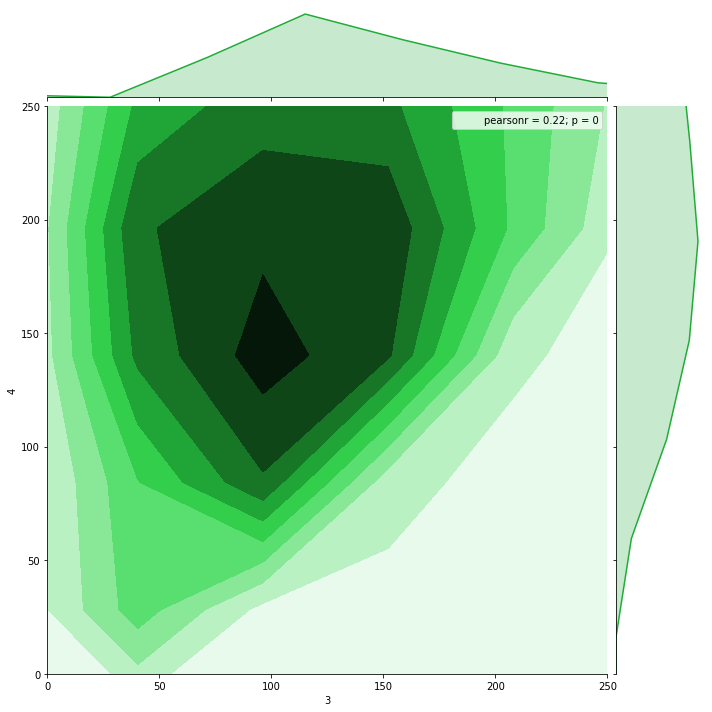

In [41]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

print (df_sum25.head())
print (df_sum25.dtypes)

#sns.pairplot(df22, hue='0', palette='summer', plot_kws={'alpha':0.2},size=10,
#             vars=['1', '2', '3', '4'], diag_kind='kde')

sns.jointplot('3', '4', data=df_sum25, kind="kde", color="#21AB38",
               size=10, ratio=6, space=0.1, xlim=(0,250), ylim=(0, 250))

plt.savefig('200128_628_A549-mCh_Iba1_Ki67_639jointplot05.png')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_639jointplot05.pdf')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_639jointplot05.eps')

      0        1       2       3       4   0.1       1.1     2.1     3.1  \
0  21.0  2722.50  318.69   10.49   67.19  25.0   1361.25  134.19  108.25   
1  21.0  6806.25  477.72  187.92  162.48  25.0  50366.25   13.98   81.69   
2  21.0  8167.50  463.80  210.17  198.75  25.0   6806.25   25.41   72.07   
3  21.0  4764.38  433.15  165.42  141.33  25.0   2722.50   35.48   23.88   
4  21.0  4764.38  453.47  140.30  131.27  25.0    680.62   74.25   62.76   

      4.1  
0  130.33  
1  154.09  
2  141.00  
3   80.20  
4  114.91  
0      float64
1      float64
2      float64
3      float64
4      float64
0.1    float64
1.1    float64
2.1    float64
3.1    float64
4.1    float64
dtype: object


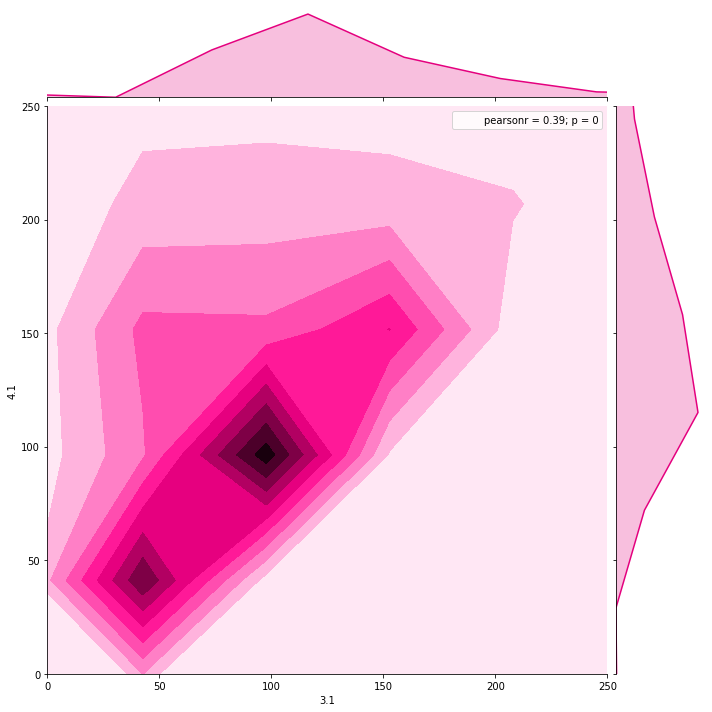

In [42]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

print (df_sum25.head())
print (df_sum25.dtypes)

#sns.pairplot(df22, hue='0', palette='summer', plot_kws={'alpha':0.2},size=10,
#             vars=['1', '2', '3', '4'], diag_kind='kde')

sns.jointplot('3.1', '4.1', data=df_sum25, kind="kde", color='#E4007E',
               size=10, ratio=6, space=0.1, xlim=(0,250), ylim=(0, 250))

plt.savefig('200128_628_A549-mCh_Iba1_Ki67_639jointplot06.png')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_639jointplot06.pdf')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_639jointplot06.eps')

      0          1       2      3       4   0.1       1.1     2.1    3.1  \
0  11.0   14293.12   52.73   6.20   13.72  15.0   1361.25   67.03  89.06   
1  11.0    2722.50  472.65  21.03    5.83  15.0  10209.38  140.11  13.02   
2  11.0    6125.62  430.28  13.87    6.32  15.0  14973.75  100.92  70.90   
3  11.0   27225.00  468.52   5.05   44.32  15.0  11570.62  171.83   7.23   
4  11.0  258637.50  168.05  22.41  214.05  15.0  22460.62   23.07   4.05   

     4.1  
0  76.73  
1  46.28  
2  16.08  
3  84.10  
4   9.04  
0      float64
1      float64
2      float64
3      float64
4      float64
0.1    float64
1.1    float64
2.1    float64
3.1    float64
4.1    float64
dtype: object


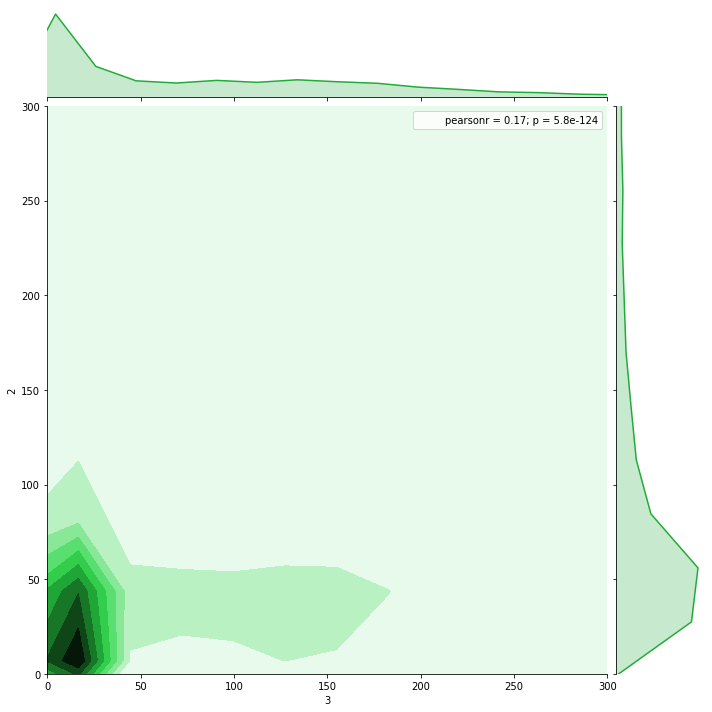

In [28]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

print (df_sum15.head())
print (df_sum15.dtypes)

#sns.pairplot(df22, hue='0', palette='summer', plot_kws={'alpha':0.2},size=10,
#             vars=['1', '2', '3', '4'], diag_kind='kde')

sns.jointplot('3', '2', data=df_sum15, kind="kde", color='#21AB38',
               size=10, ratio=6, space=0.1, xlim=(0,300), ylim=(0, 300))

plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot07.png')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot07.pdf')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot07.eps')

      0          1       2      3       4   0.1       1.1     2.1    3.1  \
0  11.0   14293.12   52.73   6.20   13.72  15.0   1361.25   67.03  89.06   
1  11.0    2722.50  472.65  21.03    5.83  15.0  10209.38  140.11  13.02   
2  11.0    6125.62  430.28  13.87    6.32  15.0  14973.75  100.92  70.90   
3  11.0   27225.00  468.52   5.05   44.32  15.0  11570.62  171.83   7.23   
4  11.0  258637.50  168.05  22.41  214.05  15.0  22460.62   23.07   4.05   

     4.1  
0  76.73  
1  46.28  
2  16.08  
3  84.10  
4   9.04  
0      float64
1      float64
2      float64
3      float64
4      float64
0.1    float64
1.1    float64
2.1    float64
3.1    float64
4.1    float64
dtype: object


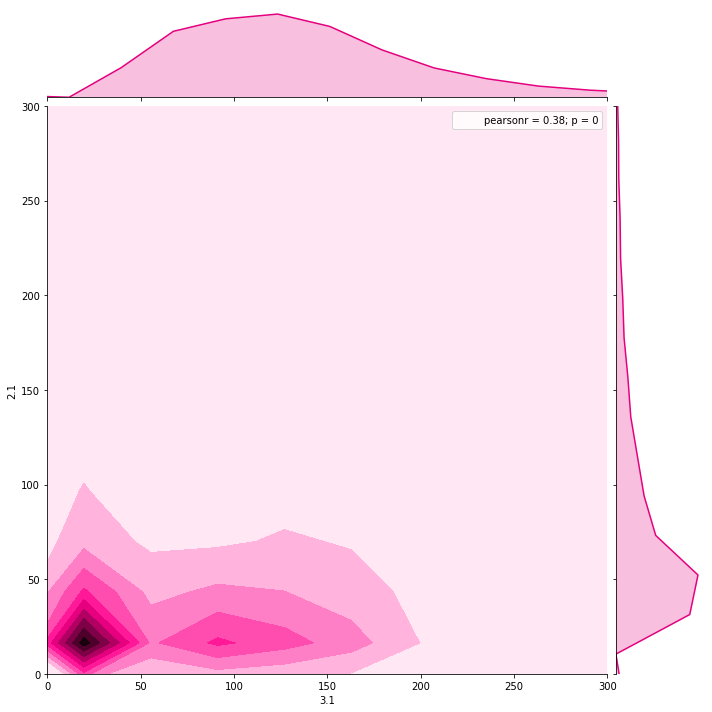

In [30]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

print (df_sum15.head())
print (df_sum15.dtypes)

#sns.pairplot(df22, hue='0', palette='summer', plot_kws={'alpha':0.2},size=10,
#             vars=['1', '2', '3', '4'], diag_kind='kde')

sns.jointplot('3.1', '2.1', data=df_sum15, kind="kde", color='#E4007E',
               size=10, ratio=6, space=0.1, xlim=(0,300), ylim=(0, 300))

plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot09.png')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot09.pdf')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot09.eps')

      0        1       2       3       4   0.1       1.1     2.1     3.1  \
0  21.0  2722.50  318.69   10.49   67.19  25.0   1361.25  134.19  108.25   
1  21.0  6806.25  477.72  187.92  162.48  25.0  50366.25   13.98   81.69   
2  21.0  8167.50  463.80  210.17  198.75  25.0   6806.25   25.41   72.07   
3  21.0  4764.38  433.15  165.42  141.33  25.0   2722.50   35.48   23.88   
4  21.0  4764.38  453.47  140.30  131.27  25.0    680.62   74.25   62.76   

      4.1  
0  130.33  
1  154.09  
2  141.00  
3   80.20  
4  114.91  
0      float64
1      float64
2      float64
3      float64
4      float64
0.1    float64
1.1    float64
2.1    float64
3.1    float64
4.1    float64
dtype: object


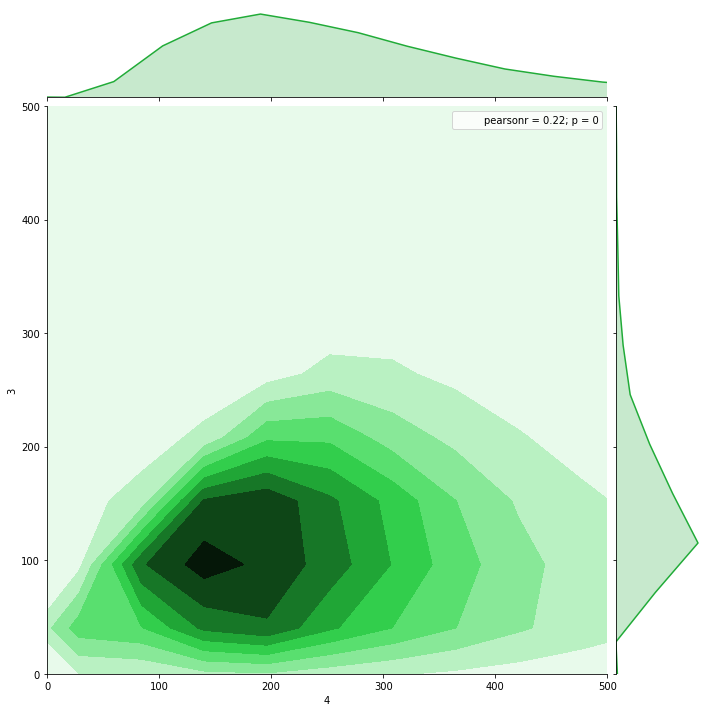

In [31]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

print (df_sum25.head())
print (df_sum25.dtypes)

#sns.pairplot(df22, hue='0', palette='summer', plot_kws={'alpha':0.2},size=10,
#             vars=['1', '2', '3', '4'], diag_kind='kde')

sns.jointplot('4', '3', data=df_sum25, kind="kde", color="#21AB38",
               size=10, ratio=6, space=0.1, xlim=(0,500), ylim=(0, 500))

plt.savefig('200128_628_A549-mCh_Iba1_Ki67_639jointplot15.png')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_639jointplot15.pdf')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_639jointplot15.eps')

      0        1       2       3       4   0.1       1.1     2.1     3.1  \
0  21.0  2722.50  318.69   10.49   67.19  25.0   1361.25  134.19  108.25   
1  21.0  6806.25  477.72  187.92  162.48  25.0  50366.25   13.98   81.69   
2  21.0  8167.50  463.80  210.17  198.75  25.0   6806.25   25.41   72.07   
3  21.0  4764.38  433.15  165.42  141.33  25.0   2722.50   35.48   23.88   
4  21.0  4764.38  453.47  140.30  131.27  25.0    680.62   74.25   62.76   

      4.1  
0  130.33  
1  154.09  
2  141.00  
3   80.20  
4  114.91  
0      float64
1      float64
2      float64
3      float64
4      float64
0.1    float64
1.1    float64
2.1    float64
3.1    float64
4.1    float64
dtype: object


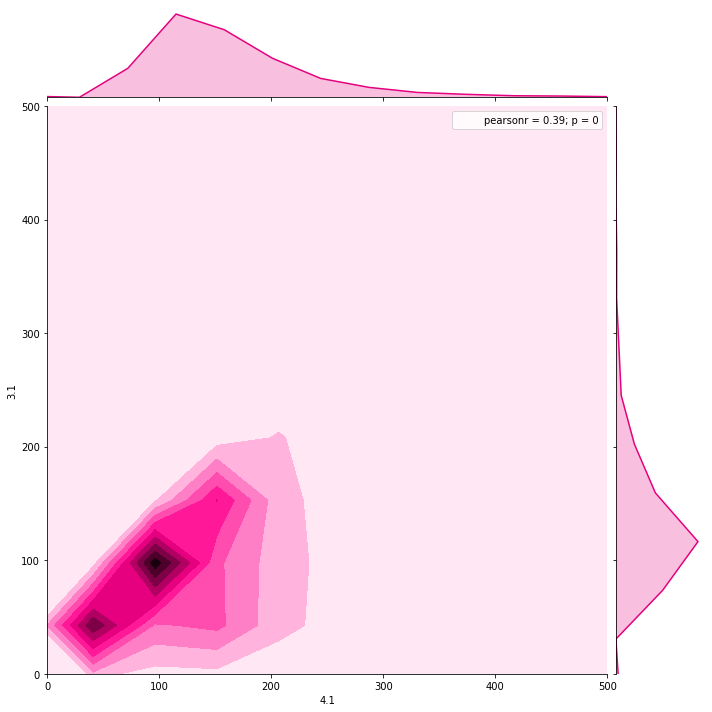

In [32]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

print (df_sum25.head())
print (df_sum25.dtypes)

#sns.pairplot(df22, hue='0', palette='summer', plot_kws={'alpha':0.2},size=10,
#             vars=['1', '2', '3', '4'], diag_kind='kde')

sns.jointplot('4.1', '3.1', data=df_sum25, kind="kde", color='#E4007E',
               size=10, ratio=6, space=0.1, xlim=(0,500), ylim=(0, 500))

plt.savefig('200128_628_A549-mCh_Iba1_Ki67_639jointplot16.png')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_639jointplot16.pdf')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_639jointplot16.eps')

      0          1       2      3       4   0.1       1.1     2.1    3.1  \
0  11.0   14293.12   52.73   6.20   13.72  15.0   1361.25   67.03  89.06   
1  11.0    2722.50  472.65  21.03    5.83  15.0  10209.38  140.11  13.02   
2  11.0    6125.62  430.28  13.87    6.32  15.0  14973.75  100.92  70.90   
3  11.0   27225.00  468.52   5.05   44.32  15.0  11570.62  171.83   7.23   
4  11.0  258637.50  168.05  22.41  214.05  15.0  22460.62   23.07   4.05   

     4.1  
0  76.73  
1  46.28  
2  16.08  
3  84.10  
4   9.04  
0      float64
1      float64
2      float64
3      float64
4      float64
0.1    float64
1.1    float64
2.1    float64
3.1    float64
4.1    float64
dtype: object


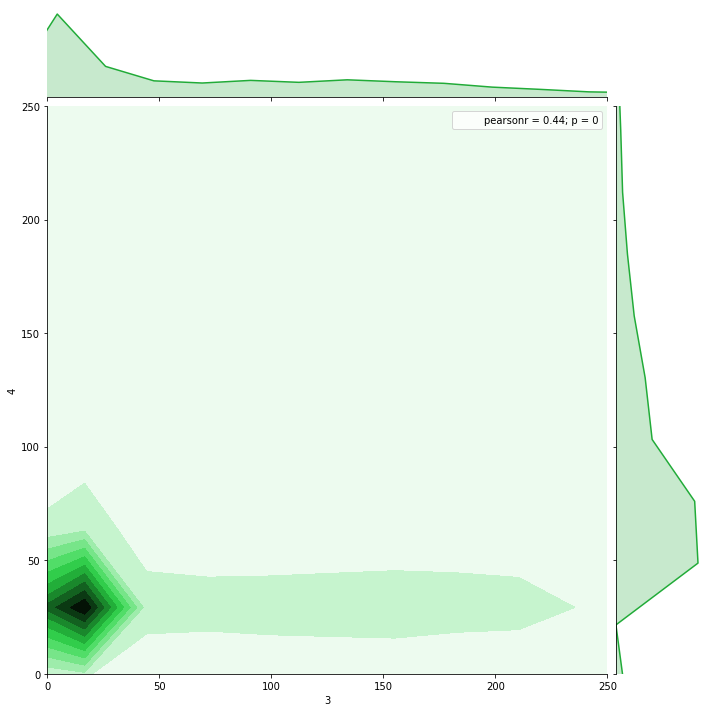

In [40]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

print (df_sum15.head())
print (df_sum15.dtypes)

#sns.pairplot(df22, hue='0', palette='summer', plot_kws={'alpha':0.2},size=10,
#             vars=['1', '2', '3', '4'], diag_kind='kde')

sns.jointplot('3', '4', data=df_sum15, kind="kde", color='#21AB38',
               size=10, ratio=6, space=0.1, xlim=(0,250), ylim=(0, 250))

plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot17.png')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot17.pdf')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot17.eps')

      0          1       2      3       4   0.1       1.1     2.1    3.1  \
0  11.0   14293.12   52.73   6.20   13.72  15.0   1361.25   67.03  89.06   
1  11.0    2722.50  472.65  21.03    5.83  15.0  10209.38  140.11  13.02   
2  11.0    6125.62  430.28  13.87    6.32  15.0  14973.75  100.92  70.90   
3  11.0   27225.00  468.52   5.05   44.32  15.0  11570.62  171.83   7.23   
4  11.0  258637.50  168.05  22.41  214.05  15.0  22460.62   23.07   4.05   

     4.1  
0  76.73  
1  46.28  
2  16.08  
3  84.10  
4   9.04  
0      float64
1      float64
2      float64
3      float64
4      float64
0.1    float64
1.1    float64
2.1    float64
3.1    float64
4.1    float64
dtype: object


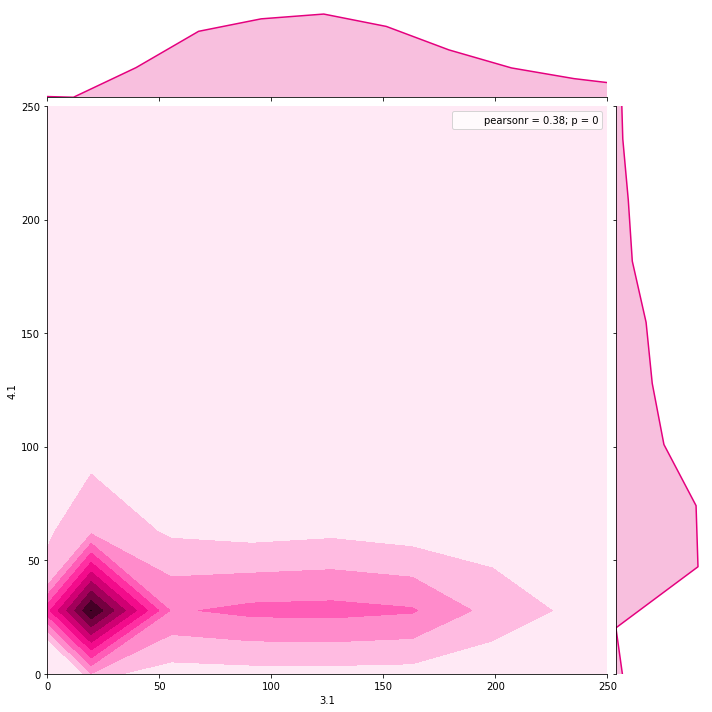

In [39]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

print (df_sum15.head())
print (df_sum15.dtypes)

#sns.pairplot(df22, hue='0', palette='summer', plot_kws={'alpha':0.2},size=10,
#             vars=['1', '2', '3', '4'], diag_kind='kde')

sns.jointplot('3.1', '4.1', data=df_sum15, kind="kde", color='#E4007E',
               size=10, ratio=6, space=0.1, xlim=(0,250), ylim=(0, 250))

plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot18.png')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot18.pdf')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot18.eps')

      0          1       2      3       4   0.1       1.1     2.1    3.1  \
0  11.0   14293.12   52.73   6.20   13.72  15.0   1361.25   67.03  89.06   
1  11.0    2722.50  472.65  21.03    5.83  15.0  10209.38  140.11  13.02   
2  11.0    6125.62  430.28  13.87    6.32  15.0  14973.75  100.92  70.90   
3  11.0   27225.00  468.52   5.05   44.32  15.0  11570.62  171.83   7.23   
4  11.0  258637.50  168.05  22.41  214.05  15.0  22460.62   23.07   4.05   

     4.1  
0  76.73  
1  46.28  
2  16.08  
3  84.10  
4   9.04  
0      float64
1      float64
2      float64
3      float64
4      float64
0.1    float64
1.1    float64
2.1    float64
3.1    float64
4.1    float64
dtype: object


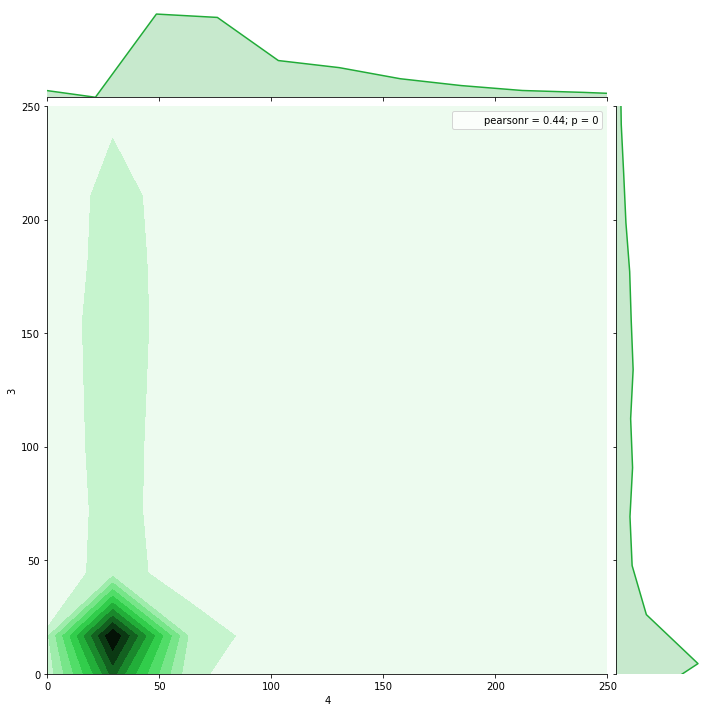

In [38]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

print (df_sum15.head())
print (df_sum15.dtypes)

#sns.pairplot(df22, hue='0', palette='summer', plot_kws={'alpha':0.2},size=10,
#             vars=['1', '2', '3', '4'], diag_kind='kde')

sns.jointplot('4', '3', data=df_sum15, kind="kde", color='#21AB38',
               size=10, ratio=6, space=0.1, xlim=(0,250), ylim=(0, 250))

plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot19.png')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot19.pdf')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot19.eps')

      0          1       2      3       4   0.1       1.1     2.1    3.1  \
0  11.0   14293.12   52.73   6.20   13.72  15.0   1361.25   67.03  89.06   
1  11.0    2722.50  472.65  21.03    5.83  15.0  10209.38  140.11  13.02   
2  11.0    6125.62  430.28  13.87    6.32  15.0  14973.75  100.92  70.90   
3  11.0   27225.00  468.52   5.05   44.32  15.0  11570.62  171.83   7.23   
4  11.0  258637.50  168.05  22.41  214.05  15.0  22460.62   23.07   4.05   

     4.1  
0  76.73  
1  46.28  
2  16.08  
3  84.10  
4   9.04  
0      float64
1      float64
2      float64
3      float64
4      float64
0.1    float64
1.1    float64
2.1    float64
3.1    float64
4.1    float64
dtype: object


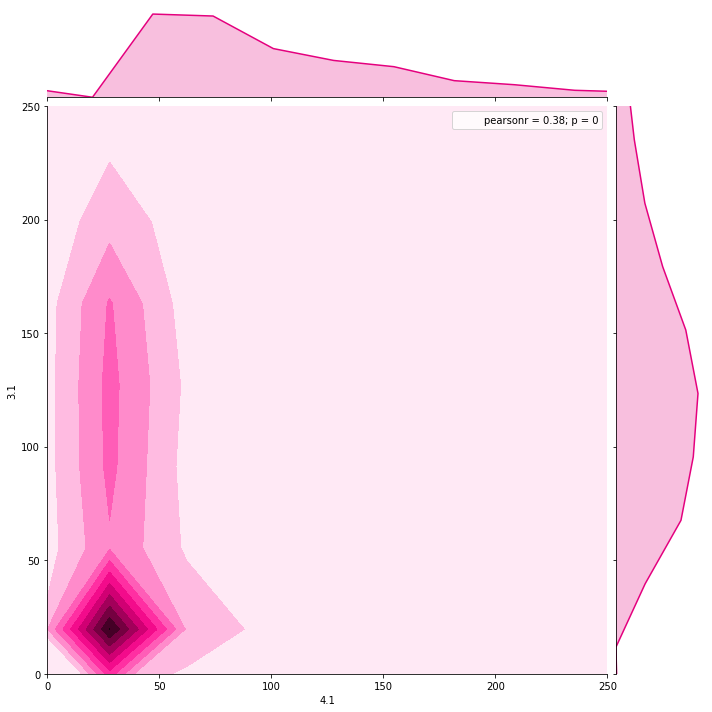

In [37]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

print (df_sum15.head())
print (df_sum15.dtypes)

#sns.pairplot(df22, hue='0', palette='summer', plot_kws={'alpha':0.2},size=10,
#             vars=['1', '2', '3', '4'], diag_kind='kde')

sns.jointplot('4.1', '3.1', data=df_sum15, kind="kde", color='#E4007E',
               size=10, ratio=6, space=0.1, xlim=(0,250), ylim=(0, 250))

plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot20.png')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot20.pdf')
plt.savefig('200128_628_A549-mCh_Iba1_Ki67_jointplot20.eps')

# 200421_Histgram

In [12]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

In [13]:
#Macおまじない
plt.style.use('ggplot') 
#font = {'family' : 'meiryo'}
#matplotlib.rc('font', **font)

/home/betalab/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


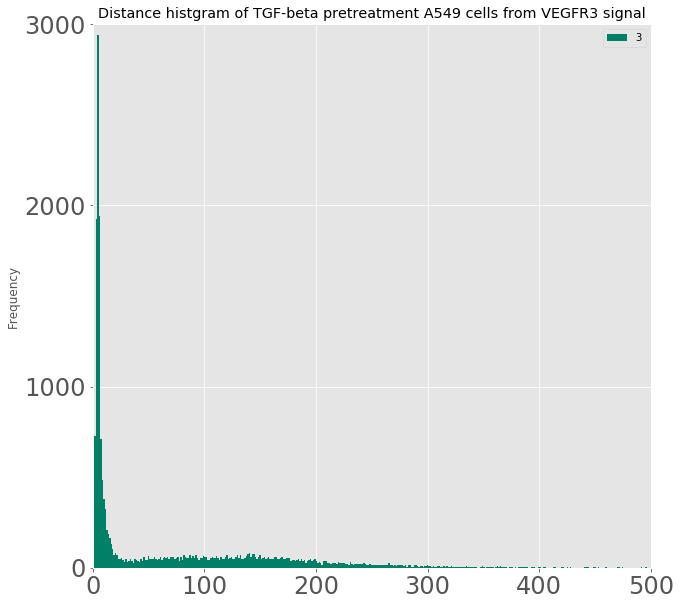

In [14]:
#列を指定
dfg = df_sum15.iloc[:,[3]]
dfg.plot(kind='hist',stacked=True, normed=False, bins=2000, alpha=1, figsize=(10,10), 
         title='Distance histgram of TGF-beta pretreatment A549 cells from VEGFR3 signal',
         grid=True, 
         xticks=[0, 100, 200, 300, 400, 500], xlim=[0,500],
         yticks=[0, 1000, 2000, 3000], ylim=[0,3000],
         fontsize=24, colormap='summer')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_BSA_f590_tVR3_hist01.png')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_BSA_f590_tVR3_hist01.pdf')

/home/betalab/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


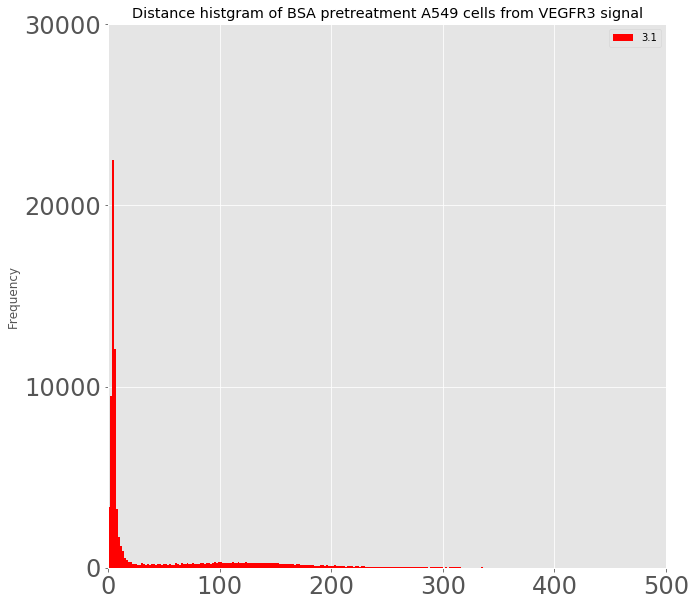

In [15]:
#列を指定
dfg = df_sum15.iloc[:,[8]]
dfg.plot(kind='hist',stacked=True, normed=False, bins=2000, alpha=1, figsize=(10,10), 
         title='Distance histgram of BSA pretreatment A549 cells from VEGFR3 signal',
         grid=True, 
         xticks=[0, 100, 200, 300, 400, 500], xlim=[0,500],
         yticks=[0, 10000, 20000, 30000], ylim=[0,30000],
         fontsize=24, colormap='autumn')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_Tb_f590_tVR3_hist02.png')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_Tb_f590_tVR3_hist02.pdf')

/home/betalab/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


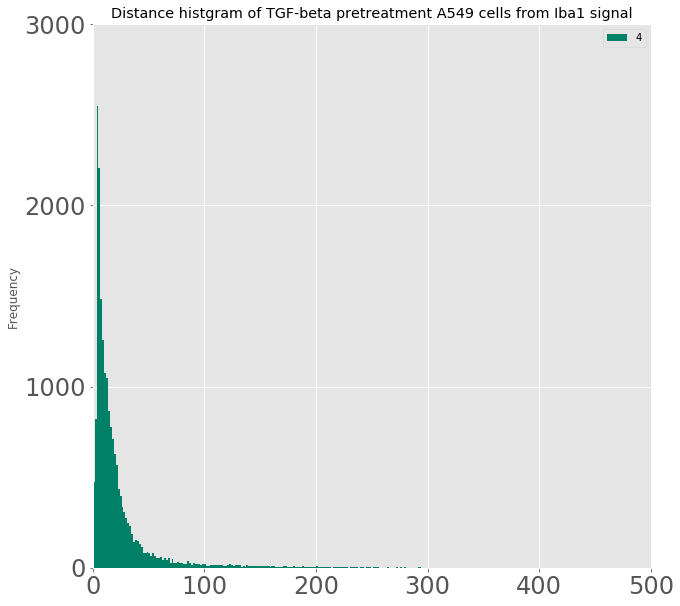

In [16]:
#列を指定
dfg = df_sum15.iloc[:,[4]]
dfg.plot(kind='hist',stacked=True, normed=False, bins=2000, alpha=1, figsize=(10,10), 
         title='Distance histgram of TGF-beta pretreatment A549 cells from Iba1 signal',
         grid=True, 
         xticks=[0, 100, 200, 300, 400, 500], xlim=[0,500],
         yticks=[0, 1000, 2000, 3000], ylim=[0,3000],
         fontsize=24, colormap='summer')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_BSA_f590_tIba1_hist03.png')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_BSA_f590_tIba1_hist03.pdf')

/home/betalab/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


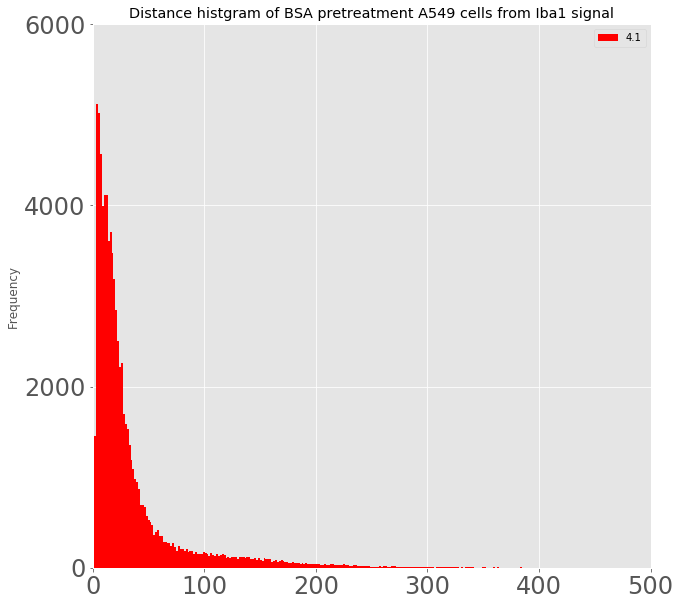

In [17]:
#列を指定
dfg = df_sum15.iloc[:,[9]]
dfg.plot(kind='hist',stacked=True, normed=False, bins=2000, alpha=1, figsize=(10,10), 
         title='Distance histgram of BSA pretreatment A549 cells from Iba1 signal',
         grid=True, 
         xticks=[0, 100, 200, 300, 400, 500], xlim=[0,500],
         yticks=[0, 2000, 4000, 6000], ylim=[0,6000],
         fontsize=24, colormap='autumn')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_Tb_f590_tIba1_hist04.png')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_Tb_f590_tIba1_hist04.pdf')

/home/betalab/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


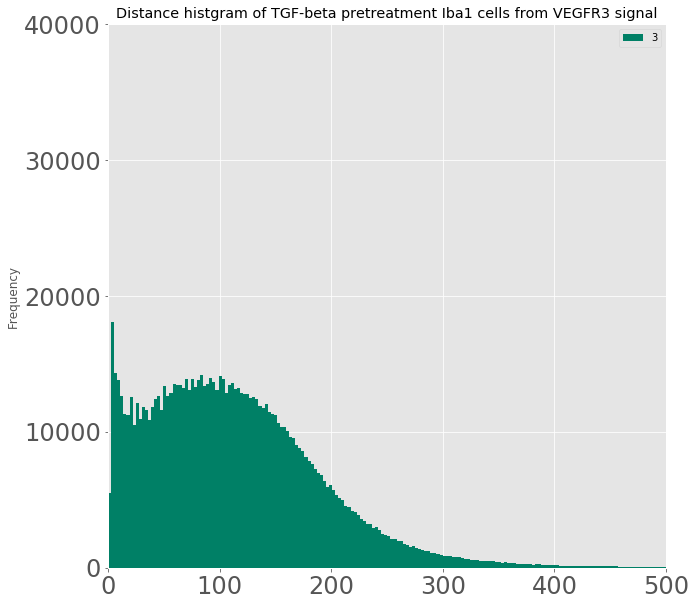

In [22]:
#列を指定
dfg = df_sum25.iloc[:,[3]]
dfg.plot(kind='hist',stacked=True, normed=False, bins=2000, alpha=1, figsize=(10,10), 
         title='Distance histgram of TGF-beta pretreatment Iba1 cells from VEGFR3 signal',
         grid=True, 
         xticks=[0, 100, 200, 300, 400, 500], xlim=[0,500],
         yticks=[0, 10000, 20000, 30000, 40000], ylim=[0,40000],
         fontsize=24, colormap='summer')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_BSA_fIba1_tVR3_hist05.png')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_BSA_fIba1_tVR3_hist05.pdf')

/home/betalab/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


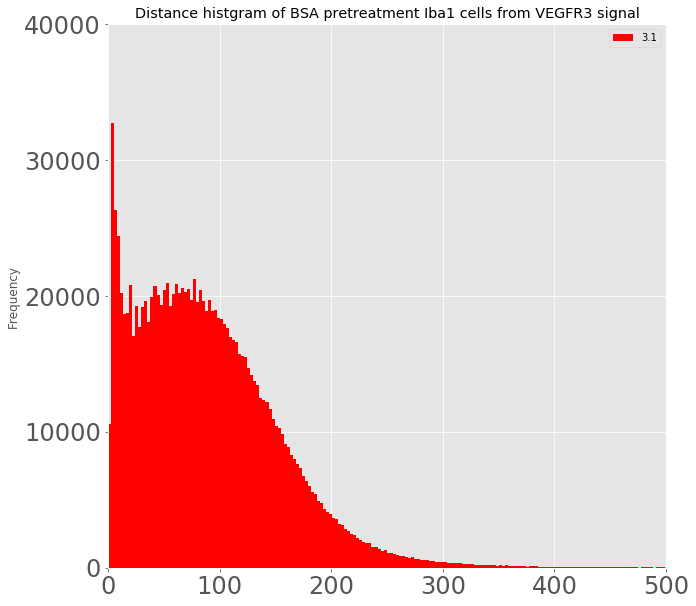

In [19]:
#列を指定
dfg = df_sum25.iloc[:,[8]]
dfg.plot(kind='hist',stacked=True, normed=False, bins=2000, alpha=1, figsize=(10,10), 
         title='Distance histgram of BSA pretreatment Iba1 cells from VEGFR3 signal',
         grid=True, 
         xticks=[0, 100, 200, 300, 400, 500], xlim=[0,500],
         yticks=[0, 10000, 20000, 30000, 40000], ylim=[0,40000],
         fontsize=24, colormap='autumn')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_Tb_fIba1_tVR3_hist06.png')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_Tb_fIba1_tVR3_hist06.pdf')

/home/betalab/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


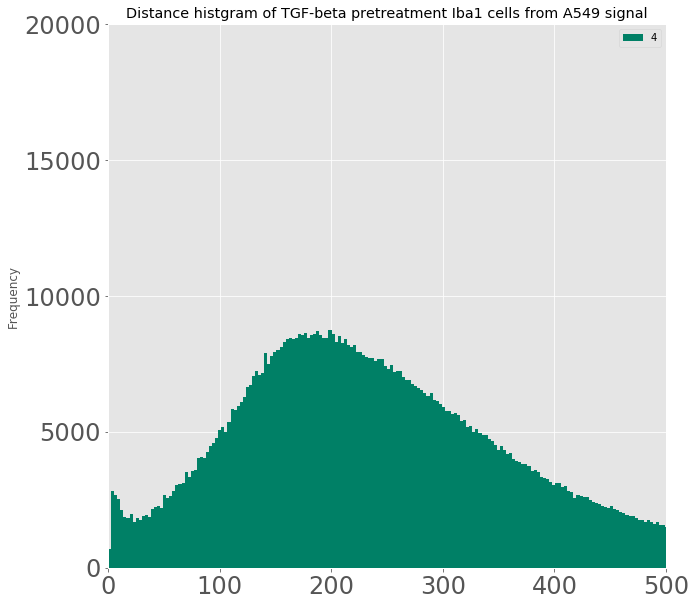

In [20]:
#列を指定
dfg = df_sum25.iloc[:,[4]]
dfg.plot(kind='hist',stacked=True, normed=False, bins=2000, alpha=1, figsize=(10,10), 
         title='Distance histgram of TGF-beta pretreatment Iba1 cells from A549 signal',
         grid=True, 
         xticks=[0, 100, 200, 300, 400, 500], xlim=[0,500],
         yticks=[0, 5000, 10000, 15000, 20000], ylim=[0,20000],
         fontsize=24, colormap='summer')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_BSA_fIba1_t590_hist07.png')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_BSA_fIba1_t590_hist07.pdf')

/home/betalab/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


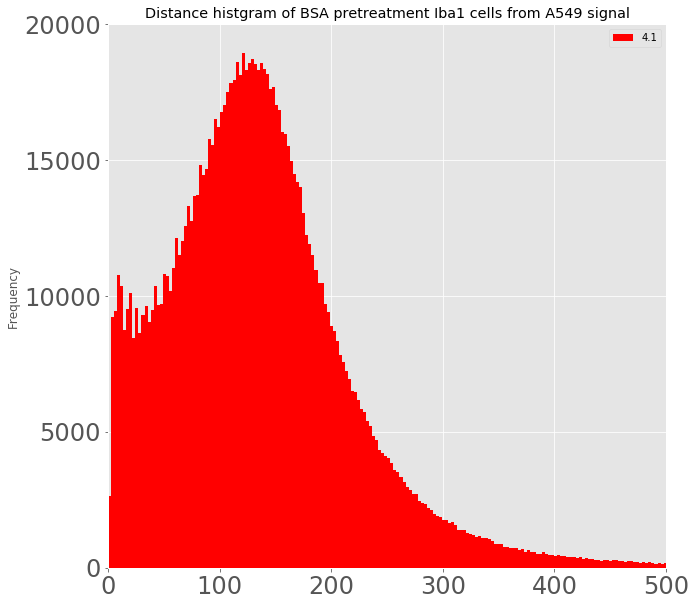

In [21]:
#列を指定
dfg = df_sum25.iloc[:,[9]]
dfg.plot(kind='hist',stacked=True, normed=False, bins=2000, alpha=1, figsize=(10,10), 
         title='Distance histgram of BSA pretreatment Iba1 cells from A549 signal',
         grid=True, 
         xticks=[0, 100, 200, 300, 400, 500], xlim=[0,500],
         yticks=[0, 5000, 10000, 15000, 20000], ylim=[0,20000],
         fontsize=24, colormap='autumn')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_Tb_fIba1_t590_hist08.png')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_Tb_fIba1_t590_hist08.pdf')

### 200519

In [10]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

In [11]:
#Macおまじない
plt.style.use('ggplot') 
#font = {'family' : 'meiryo'}
#matplotlib.rc('font', **font)

/Users/shimpei.i.kubota/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


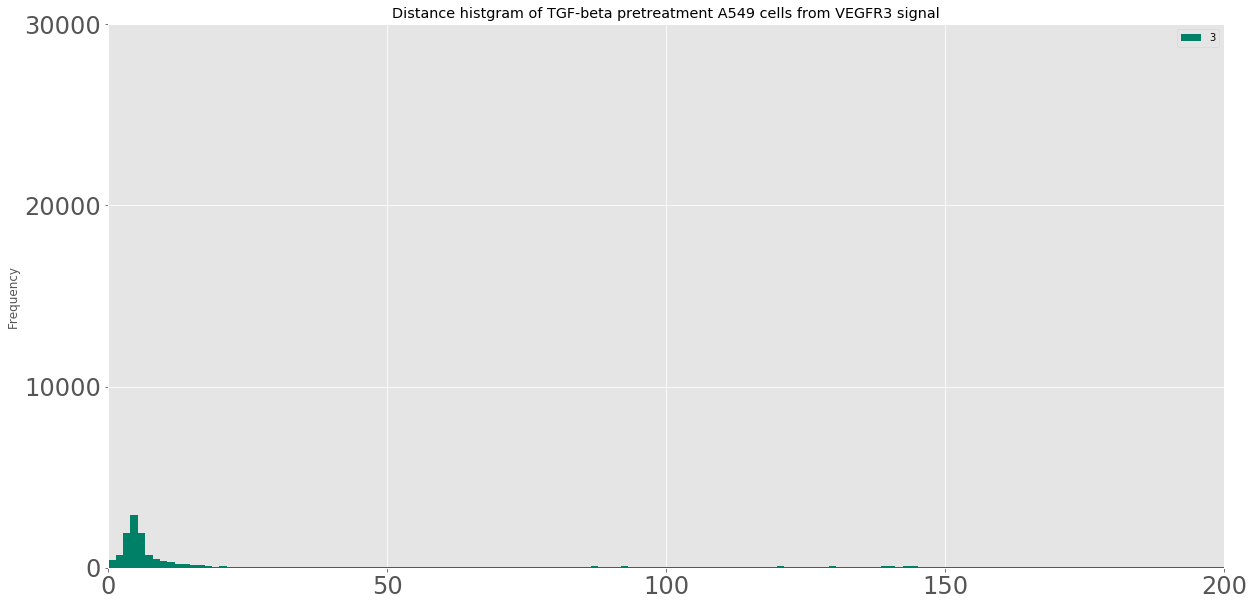

In [17]:
#列を指定
dfg = df_sum15.iloc[:,[3]]
dfg.plot(kind='hist',stacked=True, normed=False, bins=2000, alpha=1, figsize=(20,10), 
         title='Distance histgram of TGF-beta pretreatment A549 cells from VEGFR3 signal',
         grid=True, 
         xticks=[0, 50, 100, 150, 200], xlim=[0,200],
         yticks=[0, 10000, 20000, 30000], ylim=[0,30000],
         fontsize=24, colormap='summer')
plt.savefig('200519_A549_Iba1_Ki67_Iba1_BSA_f590_tVR3_hist01.png')
plt.savefig('200519_A549_Iba1_Ki67_Iba1_BSA_f590_tVR3_hist01.pdf')

/Users/shimpei.i.kubota/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


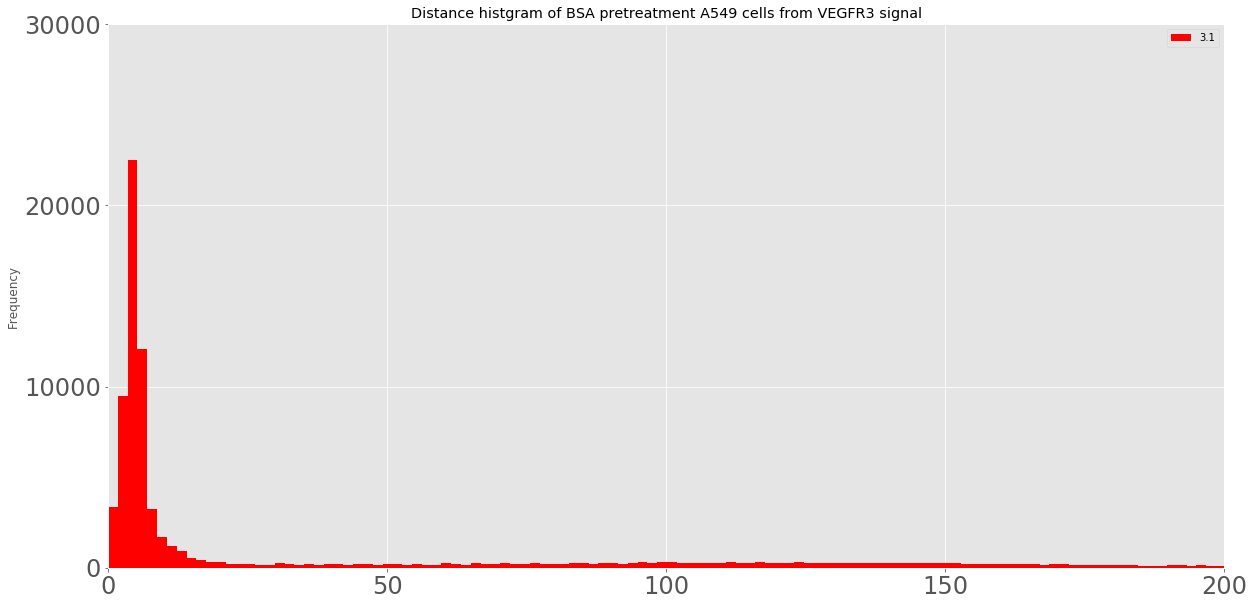

In [18]:
#列を指定
dfg = df_sum15.iloc[:,[8]]
dfg.plot(kind='hist',stacked=True, normed=False, bins=2000, alpha=1, figsize=(20,10), 
         title='Distance histgram of BSA pretreatment A549 cells from VEGFR3 signal',
         grid=True, 
         xticks=[0, 50, 100, 150, 200], xlim=[0,200],
         yticks=[0, 10000, 20000, 30000], ylim=[0,30000],
         fontsize=24, colormap='autumn')
plt.savefig('200519_A549_Iba1_Ki67_Iba1_Tb_f590_tVR3_hist02.png')
plt.savefig('200519_A549_Iba1_Ki67_Iba1_Tb_f590_tVR3_hist02.pdf')

/Users/shimpei.i.kubota/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


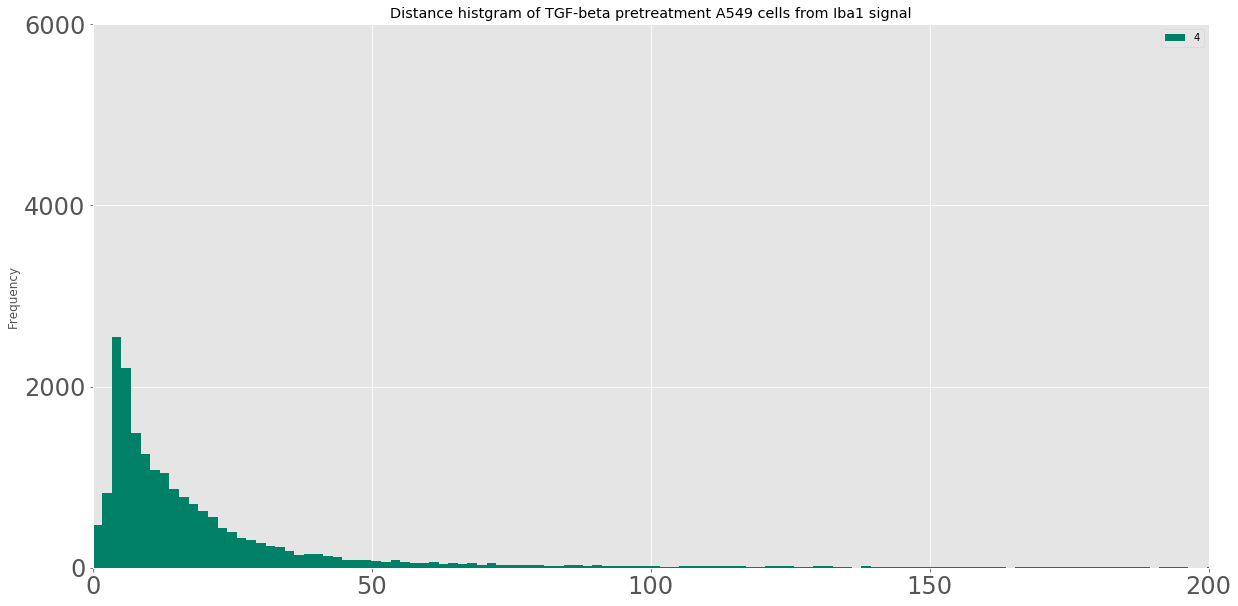

In [19]:
#列を指定
dfg = df_sum15.iloc[:,[4]]
dfg.plot(kind='hist',stacked=True, normed=False, bins=2000, alpha=1, figsize=(20,10), 
         title='Distance histgram of TGF-beta pretreatment A549 cells from Iba1 signal',
         grid=True, 
         xticks=[0, 50, 100, 150, 200], xlim=[0,200],
         yticks=[0, 2000, 4000, 6000], ylim=[0,6000],
         fontsize=24, colormap='summer')
plt.savefig('200519_A549_Iba1_Ki67_Iba1_BSA_f590_tIba1_hist03.png')
plt.savefig('200519_A549_Iba1_Ki67_Iba1_BSA_f590_tIba1_hist03.pdf')

/Users/shimpei.i.kubota/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


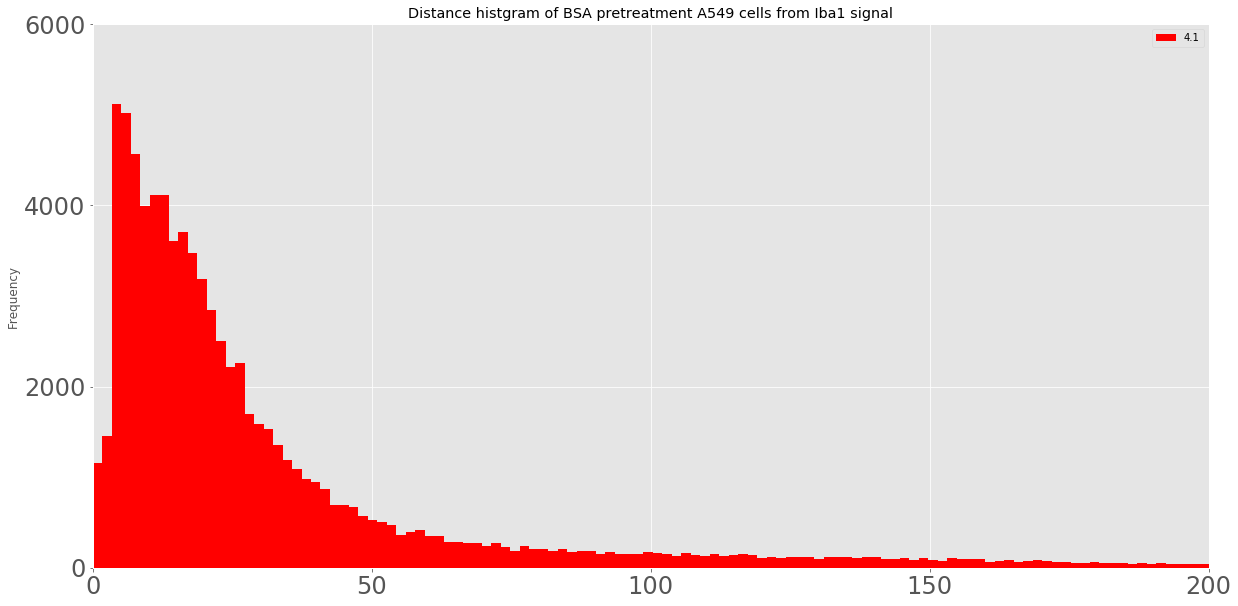

In [16]:
#列を指定
dfg = df_sum15.iloc[:,[9]]
dfg.plot(kind='hist',stacked=True, normed=False, bins=2000, alpha=1, figsize=(20,10), 
         title='Distance histgram of BSA pretreatment A549 cells from Iba1 signal',
         grid=True, 
         xticks=[0, 50, 100, 150, 200], xlim=[0,200],
         yticks=[0, 2000, 4000, 6000], ylim=[0,6000],
         fontsize=24, colormap='autumn')
plt.savefig('200519_A549_Iba1_Ki67_Iba1_Tb_f590_tIba1_hist04.png')
plt.savefig('200519_A549_Iba1_Ki67_Iba1_Tb_f590_tIba1_hist04.pdf')